In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import io

In [3]:
# Cargamos el modelo vgg16
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [4]:
def cnn(image):
    image_copy = image.copy()
    # Convertimos la imagen a escala de grises y la redimensionamos para que la acepte VGG16.
    image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
    image_copy = cv2.resize(image_copy,(224,224), interpolation=cv2.INTER_AREA)
    # Preprocesamos  la imagen.
    image_copy = preprocess_input(image_copy)
    image_batch = np.expand_dims(image_copy, axis=0)
    original_stdout = sys.stdout
    sys.stdout = io.StringIO()
    features = vgg.predict(image_batch)
    features = features.reshape(features.shape[0],(512*7*7))

    return features

In [5]:
from utils.utils import load_images
from utils.features import load_features, save_features, extract_features
from utils.matching import minmin_retrival, match_all_images
from utils.scoring import calculate_metrics

c:\Users\34699\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
test_meta, test_images = load_images(False)
train_meta, train_images = load_images(True)

In [7]:
query_idx = 56
query_img = test_images[query_idx]
query_desc = cnn(query_img)
query_desc.shape[1]

25088

In [8]:
# SOLO EJECUTAR LA PRIMERA VEZ
# descriptores_train,meta_desc_train = extract_features(cnn,train_images)
# save_features(descriptores_train,meta_desc_train,train_meta,"descriptores_train_CNN")
# descriptores_test,meta_desc_test = extract_features(cnn,test_images)
# save_features(descriptores_test,meta_desc_test,test_meta,"descriptores_test_CNN")

In [9]:
meta_desc_train, descriptores_train = load_features('../features/descriptores_train_CNN.csv')
meta_desc_test, descriptores_test = load_features('../features/descriptores_test_CNN.csv')

In [20]:
matches_L1 = minmin_retrival(query_desc,descriptores_train,meta_desc_train,best_k=5,distance_function=cv2.NORM_L1)

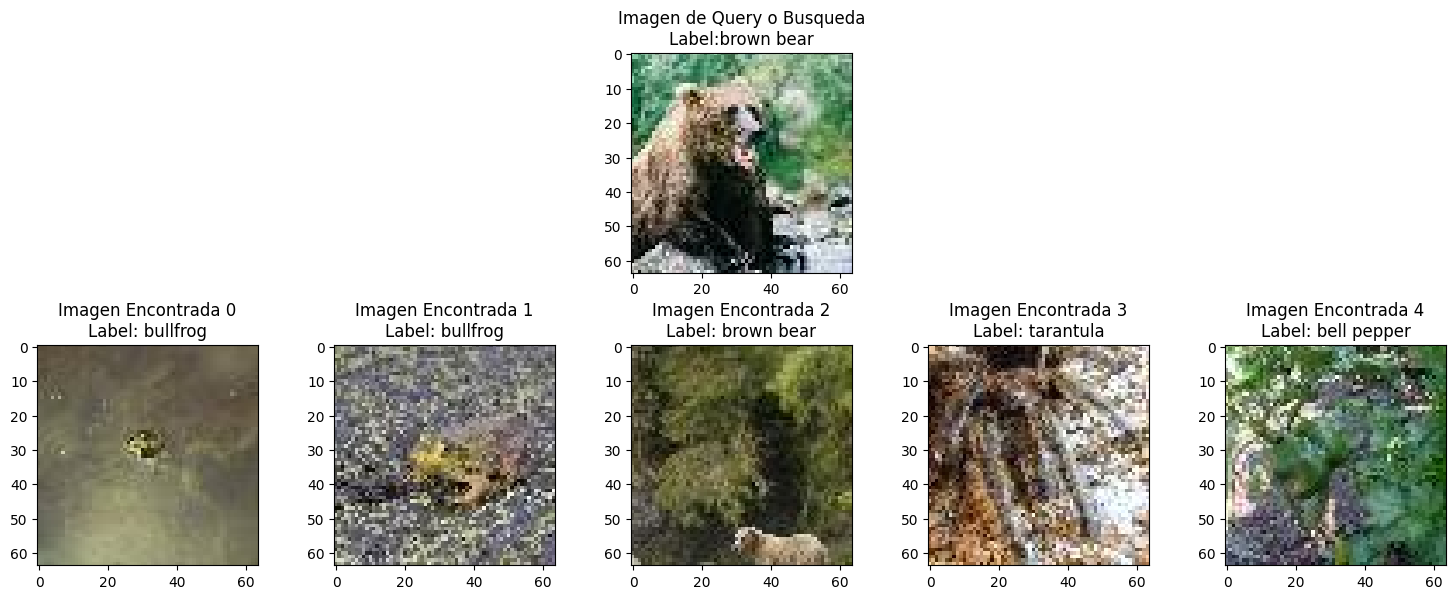

In [21]:
fig, ax = plt.subplots(2, 5,  figsize = (15, 6))

ax[0][2].imshow(test_images[query_idx])
ax[0][2].set_title("Imagen de Query o Busqueda\nLabel:" + test_meta.loc[query_idx, 'label'])
for i, img_id in enumerate(matches_L1[:5], start = 0):
    ax[1][i].imshow(train_images[img_id])
    label = train_meta.loc[img_id, 'label']
    ax[1][i].set_title(f"Imagen Encontrada {i}\nLabel: {label}")

fig.delaxes(ax[0][0])
fig.delaxes(ax[0][1])
fig.delaxes(ax[0][3])
fig.delaxes(ax[0][4])

fig.tight_layout()

In [22]:
matches_L2 = minmin_retrival(query_desc,descriptores_test,meta_desc_test,best_k=5,distance_function=cv2.NORM_L2)

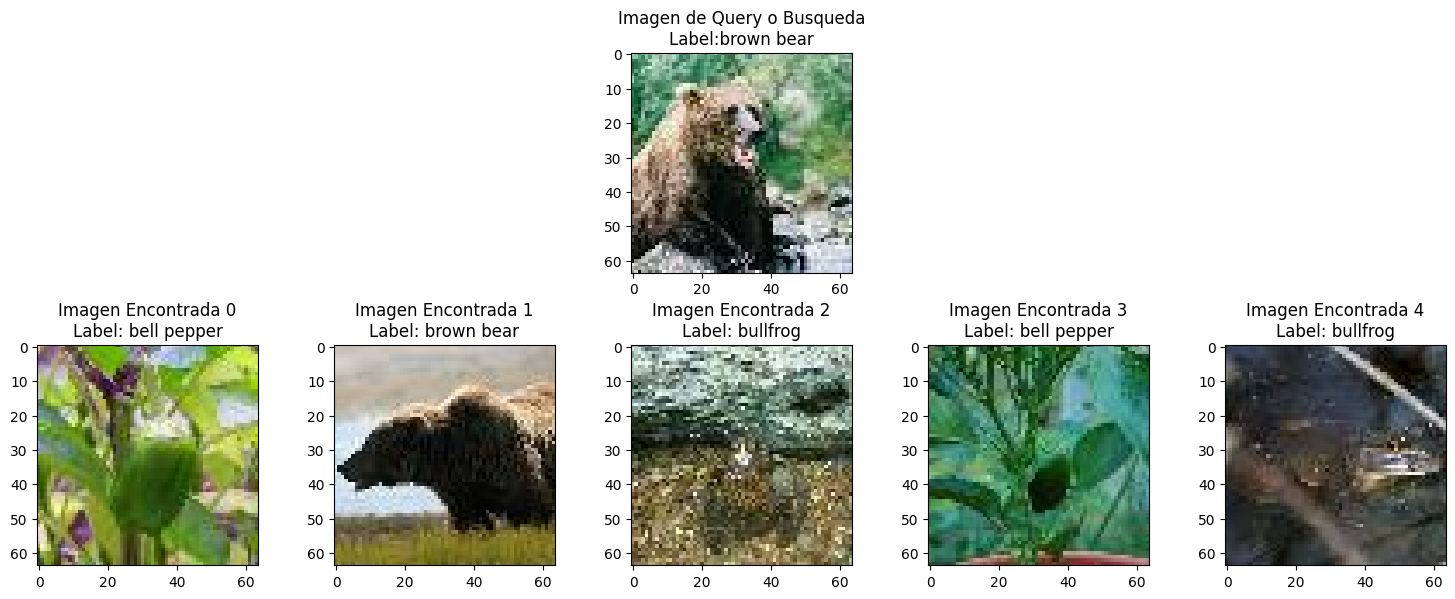

In [23]:
fig, ax = plt.subplots(2, 5,  figsize = (15, 6))

ax[0][2].imshow(test_images[query_idx])
ax[0][2].set_title("Imagen de Query o Busqueda\nLabel:" + test_meta.loc[query_idx, 'label'])
for i, img_id in enumerate(matches_L2[:5], start = 0):
    ax[1][i].imshow(train_images[img_id])
    label = train_meta.loc[img_id, 'label']
    ax[1][i].set_title(f"Imagen Encontrada {i}\nLabel: {label}")

fig.delaxes(ax[0][0])
fig.delaxes(ax[0][1])
fig.delaxes(ax[0][3])
fig.delaxes(ax[0][4])

fig.tight_layout()

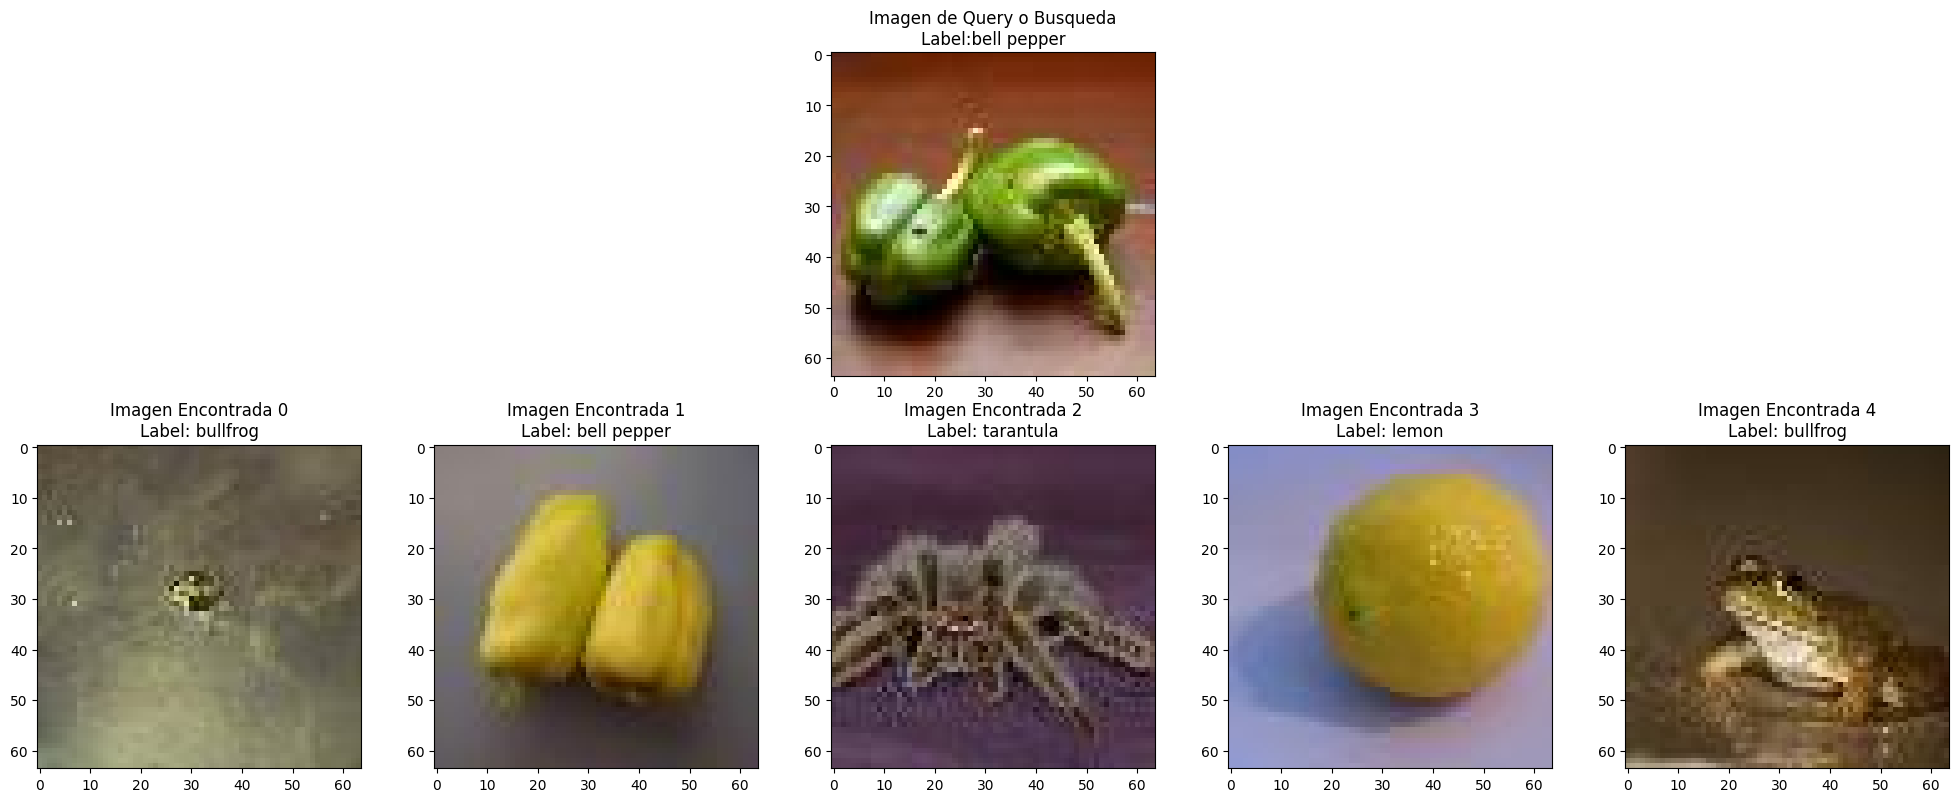

In [34]:
xr = match_all_images(descriptores_test, meta_desc_test, descriptores_train, meta_desc_train, best_k=50, distance_function=cv2.NORM_L2)
fig, ax = plt.subplots(2, 5,  figsize = (20, 8))

test_img = 10
ax[0][2].imshow(test_images[test_img])
ax[0][2].set_title("Imagen de Query o Busqueda\nLabel:" + test_meta.loc[test_img, 'label'])
for i, img_id in enumerate(xr[test_img][:5], start = 0):
    ax[1][i].imshow(train_images[img_id])
    label = train_meta.loc[img_id, 'label']
    ax[1][i].set_title(f"Imagen Encontrada {i}\nLabel: {label}");

fig.delaxes(ax[0][0])
fig.delaxes(ax[0][1])
fig.delaxes(ax[0][3])
fig.delaxes(ax[0][4])

fig.tight_layout()

In [35]:
calculate_metrics(xr, train_meta, test_meta, scores = (1, 5, 10, 25, 50))

,Precision@K,Recall@K,R-Precision@K
K,,,
1,0.220000,0.003143,0.220000
5,0.228000,0.016286,0.228000
10,0.195000,0.027857,0.195000
25,0.161067,0.057524,0.161067
50,0.149400,0.106714,0.149400
